In [124]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
os.getcwd()

'C:\\Users\\menth\\Desktop\\M1 LM\\S1\\Evolutions de la comédie au XVIIIè siècle\\Projet Saison Comédie Française'

In [125]:
# Importation des données JSON sur les performances de la Comédie Française depuis sa création jusqu'à aujourd'hui

URL = 'https://hack.cfregisters.org/data/json/performances.json'
CF_performances = pd.read_json(URL)

In [126]:
# Importation des données JSON sur les pièces de la Comédie Française depuis sa création jusqu'à aujourd'hui

URL = 'https://hack.cfregisters.org/data/json/plays.json'
CF_pièces = pd.read_json(URL)

In [127]:
print(CF_performances.info())
print('\n')
print(CF_pièces.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63452 entries, 0 to 63451
Data columns (total 6 columns):
acts                      63388 non-null float64
author                    63409 non-null object
first_performance_date    41245 non-null object
genre                     63409 non-null object
performance_date          63452 non-null object
title                     63409 non-null object
dtypes: float64(1), object(5)
memory usage: 2.9+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 15 columns):
_packed_id               1036 non-null int64
acts                     1033 non-null float64
alternative_title        938 non-null object
author                   1036 non-null object
created_at               1035 non-null datetime64[ns]
date_de_creation         920 non-null object
expert_validated         1036 non-null bool
genre                    1036 non-null object
id                       1036 non-null int64
musique_danse_machin

In [128]:
# Je merge les deux tables via les clés communes : 'author' et 'title'

CF = CF_performances.merge(CF_pièces, on="author" and 'title')
CF.head(5)

,acts_x,author_x,first_performance_date,genre_x,performance_date,title,_packed_id,acts_y,alternative_title,author_y,created_at,date_de_creation,expert_validated,genre_y,id,musique_danse_machine,prologue,prose_vers,updated_at,url
0,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-04-30,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,
1,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-05-03,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,
2,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-05-05,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,
3,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-05-07,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,
4,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-05-10,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,


In [129]:
# Je filtre les dates de représentations par rapport aux dates de début et de fin de la saison qui m'intéresse (1733-1734)
start_date = "1733-04-13"
end_date = "1734-04-10"
after_start_date = CF["performance_date"] >= start_date
before_end_date = CF["performance_date"] <= end_date
between_two_dates = after_start_date & before_end_date

CF_saison = CF.loc[between_two_dates]

In [130]:
CF_saison.head(5)

,acts_x,author_x,first_performance_date,genre_x,performance_date,title,_packed_id,acts_y,alternative_title,author_y,created_at,date_de_creation,expert_validated,genre_y,id,musique_danse_machine,prologue,prose_vers,updated_at,url
407,1.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1733-07-27,Sganarelle ou le Cocu imaginaire,1012,1.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:06.406745,None,True,comédie,5422,False,False,vers,2014-05-08 20:46:54.615960,None
789,1.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1733-05-11,Mariage forcé (Le),768,1.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:04.064721,None,True,comédie,5149,True,False,prose,2014-05-08 20:46:48.060123,None
790,1.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1734-01-20,Mariage forcé (Le),768,1.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:04.064721,None,True,comédie,5149,True,False,prose,2014-05-08 20:46:48.060123,None
2190,3.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1733-04-19,George Dandin ou le Mari confondu,574,3.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:02.214058,None,True,comédie,4932,True,False,prose,2014-05-08 20:46:42.269281,None
2191,3.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1733-05-04,George Dandin ou le Mari confondu,574,3.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:02.214058,None,True,comédie,4932,True,False,prose,2014-05-08 20:46:42.269281,None


In [131]:
# Je ne garde ici que les variables porteuses d'informations. Les autres sont soit des variables redondantes dans les deux tables
# (performances et pièces), soient des variables binaires non porteuses d'informations car 'vraies' partout ('expert_validated')


CF_saison = CF_saison[['author_x','title','genre_x','performance_date','first_performance_date','acts_x', 'alternative_title',
                       'musique_danse_machine', 'prologue','prose_vers']]
CF_saison.head(5)

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
407,Molière (Jean-Baptiste Poquelin dit),Sganarelle ou le Cocu imaginaire,comédie,1733-07-27,None,1.0,None,False,False,vers
789,Molière (Jean-Baptiste Poquelin dit),Mariage forcé (Le),comédie,1733-05-11,None,1.0,None,True,False,prose
790,Molière (Jean-Baptiste Poquelin dit),Mariage forcé (Le),comédie,1734-01-20,None,1.0,None,True,False,prose
2190,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1733-04-19,None,3.0,None,True,False,prose
2191,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1733-05-04,None,3.0,None,True,False,prose


In [100]:
CF_saison.describe(include='all')

# On remarque :
#  - 566 pièces sont représentées au total au cours de la saison
#  - 39 auteurs différents sont représentés au cours de la saison 
#  - 102 pièces différentes sont représentées au cours de la saison
#  - On dénombre 274 dates de représentations, soit envriron 2 pièces par soir (566/274=2,06) ce qui est cohérent avec les 
#  habitudes d'alors
#  - Les pièces font en moyenne 3,1 acte.

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
count,566,566,566,566,423,566.000000,437,566,566,566
unique,39,102,7,274,64,NaN,1,2,2,6
top,Dancourt (Florent Carton dit),Œdipe,comédie,1733-11-26,1718-11-18,NaN,,False,False,vers
freq,73,21,427,5,21,NaN,437,414,485,366
mean,NaN,NaN,NaN,NaN,NaN,3.155477,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.743924,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


# Soirée type à la C-F en 1733-1734

### 1. Longueur des pièces

     counts  percentage
5.0     239   42.226148
1.0     193   34.098940
3.0     130   22.968198
2.0       4    0.706714


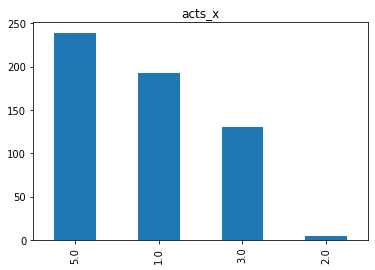

In [101]:
# Etude des occurrences du nombre d'actes :
# On remarque que l'écart-type de 1,7 est très grand 
# On remarque une occurence presque égale, et surtout très importante des extrêmes : pièces en 1 acte et pièces en 5 actes
# Ainsi, l'on peut supposer que conformément à la tradition en vigueur au XVIIIe sièce, une soirée à la C-F se déroulait avec 
# pièce longue (3 ou 5 actes), suivie par une pièce courte (1 ou 2 actes). 

g = CF_saison['acts_x']
Freq_Genre = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Genre)

CF_saison['acts_x'].value_counts().plot(kind='bar', title='acts_x')

### 2. Présence de musique, danse ou machines ?

In [102]:
g = CF_saison['musique_danse_machine']
Freq_Musique = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Musique)


       counts  percentage
False     414   73.144876
True      152   26.855124


### 3. Nature de la pièce

                      counts  percentage
vers                     366   64.664311
prose                    168   29.681979
vers et vers libres       10    1.766784
prose/vers                 9    1.590106
vers libres                7    1.236749
prose et vers libres       6    1.060071


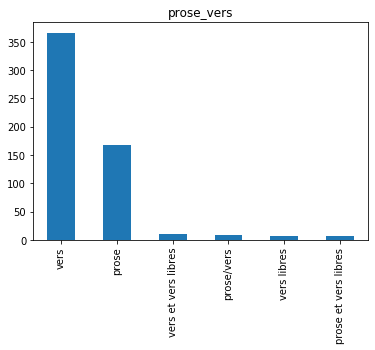

In [103]:
g = CF_saison['prose_vers']
Freq_Nature = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Nature)

CF_saison['prose_vers'].value_counts().plot(kind='bar', title='prose_vers')

### 4.Genre de la pièce

                          counts  percentage
comédie                      427   75.441696
tragédie                     116   20.494700
comédie héroïque               8    1.413428
comédie-ballet                 7    1.236749
tragi-comédie / tragédie       4    0.706714
tragi-comédie                  3    0.530035
intermède                      1    0.176678


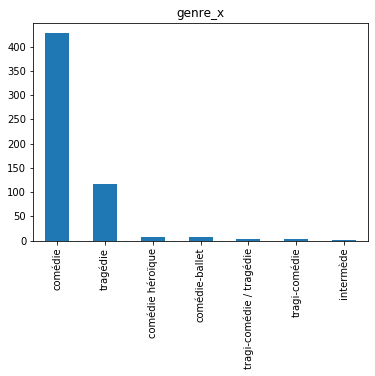

In [104]:
g = CF_saison['genre_x']
Freq_Genre = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Genre)

CF_saison['genre_x'].value_counts().plot(kind='bar', title='genre_x')

In [105]:
### Ménage pour une data viz plus épurée 

test =  CF_saison.loc[CF_saison['prose_vers'].isin(['prose', 'vers'])]

test =  test.loc[test['genre_x'].isin(['comédie', 'tragédie'])]

test =  test.loc[test['acts_x'].isin([1.0, 3.0, 5.0])]

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 407 to 54659
Data columns (total 10 columns):
author_x                  507 non-null object
title                     507 non-null object
genre_x                   507 non-null object
performance_date          507 non-null object
first_performance_date    386 non-null object
acts_x                    507 non-null float64
alternative_title         397 non-null object
musique_danse_machine     507 non-null bool
prologue                  507 non-null bool
prose_vers                507 non-null object
dtypes: bool(2), float64(1), object(7)
memory usage: 36.6+ KB


In [106]:
test

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
407,Molière (Jean-Baptiste Poquelin dit),Sganarelle ou le Cocu imaginaire,comédie,1733-07-27,None,1.0,None,False,False,vers
789,Molière (Jean-Baptiste Poquelin dit),Mariage forcé (Le),comédie,1733-05-11,None,1.0,None,True,False,prose
790,Molière (Jean-Baptiste Poquelin dit),Mariage forcé (Le),comédie,1734-01-20,None,1.0,None,True,False,prose
2190,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1733-04-19,None,3.0,None,True,False,prose
2191,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1733-05-04,None,3.0,None,True,False,prose
2192,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1733-09-24,None,3.0,None,True,False,prose
2193,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1733-12-18,None,3.0,None,True,False,prose
2194,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1734-01-26,None,3.0,None,True,False,prose
2195,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1734-03-03,None,3.0,None,True,False,prose
2196,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1734-03-22,None,3.0,None,True,False,prose


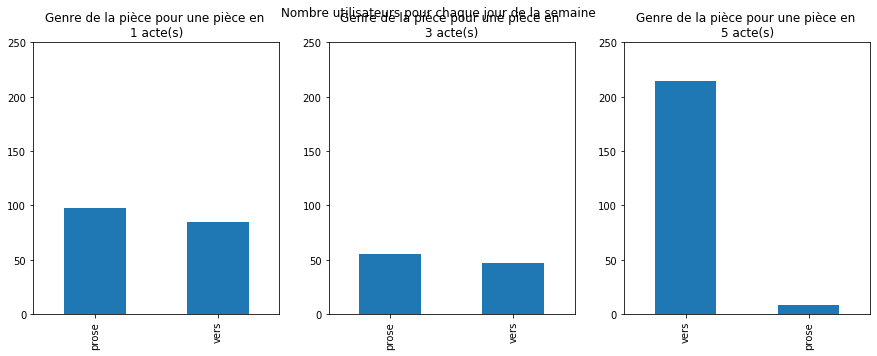

In [107]:
## En fonction du nombre d'acte de la pièce

actes=[1.0, 3.0, 5.0]

plt.figure(1,figsize = (20, 20))
plt.suptitle('Nombre utilisateurs pour chaque jour de la semaine')

for i in range(0,3) :
    plt.subplot(1,3,i+1)
    plt.title('Genre de la pièce pour une pièce en \n' +  str(int(actes[i]))  + ' acte(s)')
    plt.ylim(ymax=250)
    test[(test['acts_x'] == actes[i])]['prose_vers'].value_counts().plot(kind='bar', figsize=(15, 5))


In [109]:
long_nat_genre = pd.crosstab(index=test["acts_x"], 
                             columns=[test["prose_vers"],
                                      test["genre_x"]],
                             margins=True)   # Include row and column totals

long_nat_genre

prose_vers   prose    vers           All
genre_x    comédie comédie tragédie     
acts_x                                  
1.0             98      85        0  183
3.0             55      47        0  102
5.0              8      98      116  222
All            161     230      116  507

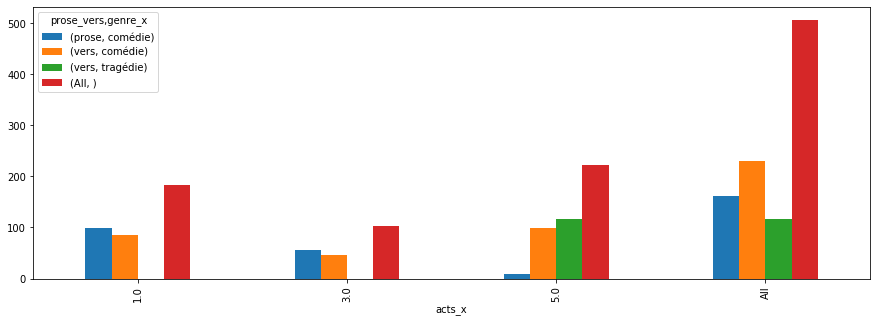

In [182]:
long_nat_genre.plot(kind='bar', figsize=(15, 5))

# Corpus, canons, auteurs ...

### 1. Les pièces les plus jouées 

In [164]:
Freq_title  = CF_saison['title'].value_counts().to_frame().reset_index()
Freq_title.columns = ['title', 'Fréquence de la pièce']


In [165]:
### Merge des fréq de représentations avec table principale 

CF_saison.sort_values(by=['title'])
Freq_title.sort_values(by=['title'])

CF_saison_2 = CF_saison.merge(Freq_title, how='inner', on="title",)
CF_saison_2 = CF_saison_2.sort_values(by=['Fréquence de la pièce'],ascending=False)


In [166]:
CF_saison_2.drop_duplicates(subset=['title'], inplace=True)
CF_saison_2 = pd.DataFrame(CF_saison_2)  
CF_saison_2_10 = CF_saison_2.head(10)
CF_saison_2_10

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers,Fréquence de la pièce
130,Voltaire (François-Marie Arouet dit),Œdipe,tragédie,1733-09-19,1718-11-18,5.0,,False,False,vers,21
508,La Chaussée (Pierre-Claude),Fausse antipathie (La),comédie,1733-10-05,1733-10-02,3.0,,False,True,vers,19
257,Dancourt (Florent Carton dit),Tuteur amoureux (Le) ou Le Tuteur,comédie,1734-03-18,1695-07-13,1.0,,False,False,prose,19
314,Dancourt (Florent Carton dit),Trois cousines (Les),comédie,1733-09-21,1700-10-18,3.0,,True,True,prose,17
219,Du Fresny (Charles),Dédit (Le),comédie,1733-11-26,1719-05-12,1.0,,False,False,vers,16
493,Pellegrin (Simon-Joseph),Pélopée,tragédie,1733-07-27,1733-07-18,5.0,,False,False,vers,16
272,Regnard (Jean-François),Joueur (Le),comédie,1734-02-07,1696-12-19,5.0,,False,False,vers,12
288,Regnard (Jean-François),Distrait (Le),comédie,1733-12-27,1697-12-02,5.0,,False,False,vers,12
479,Fagan (Barthélemy-Christophe),Rendez-vous ou l'Amour supposé (Le),comédie,1733-05-30,1733-05-27,1.0,,False,False,vers,11
409,Legrand (Marc-Antoine),Famille extravagante (La),comédie,1734-03-02,1709-06-07,1.0,,True,False,vers,11


In [167]:

CF_saison_2_10['performance_date'] = pd.to_datetime(CF_saison_2_10['performance_date'])
CF_saison_2_10['first_performance_date'] = pd.to_datetime(CF_saison_2_10['first_performance_date'])

CF_saison_2_10['year_perf'], CF_saison_2_10['year_first'] = CF_saison_2_10['performance_date'].dt.year, CF_saison_2_10['first_performance_date'].dt.year

CF_saison_2_10['Nouvelle Pièece'] = CF_saison_2_10['year_first'].isin(['1733','1734'])
CF_saison_2_10

C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers,Fréquence de la pièce,year_perf,year_first,Nouvelle Pièece
130,Voltaire (François-Marie Arouet dit),Œdipe,tragédie,1733-09-19,1718-11-18,5.0,,False,False,vers,21,1733,1718,False
508,La Chaussée (Pierre-Claude),Fausse antipathie (La),comédie,1733-10-05,1733-10-02,3.0,,False,True,vers,19,1733,1733,True
257,Dancourt (Florent Carton dit),Tuteur amoureux (Le) ou Le Tuteur,comédie,1734-03-18,1695-07-13,1.0,,False,False,prose,19,1734,1695,False
314,Dancourt (Florent Carton dit),Trois cousines (Les),comédie,1733-09-21,1700-10-18,3.0,,True,True,prose,17,1733,1700,False
219,Du Fresny (Charles),Dédit (Le),comédie,1733-11-26,1719-05-12,1.0,,False,False,vers,16,1733,1719,False
493,Pellegrin (Simon-Joseph),Pélopée,tragédie,1733-07-27,1733-07-18,5.0,,False,False,vers,16,1733,1733,True
272,Regnard (Jean-François),Joueur (Le),comédie,1734-02-07,1696-12-19,5.0,,False,False,vers,12,1734,1696,False
288,Regnard (Jean-François),Distrait (Le),comédie,1733-12-27,1697-12-02,5.0,,False,False,vers,12,1733,1697,False
479,Fagan (Barthélemy-Christophe),Rendez-vous ou l'Amour supposé (Le),comédie,1733-05-30,1733-05-27,1.0,,False,False,vers,11,1733,1733,True
409,Legrand (Marc-Antoine),Famille extravagante (La),comédie,1734-03-02,1709-06-07,1.0,,True,False,vers,11,1734,1709,False


In [168]:
print( CF_saison_2_10['author_x'].value_counts(),  '\n'*5, 
      CF_saison_2_10['genre_x'].value_counts(),  '\n'*5,
        CF_saison_2_10['acts_x'].value_counts(),   '\n'*5,
        CF_saison_2_10['prose_vers'].value_counts(), '\n'*5,
       CF_saison_2_10['Nouvelle Pièece'].value_counts() )

Dancourt (Florent Carton dit)           2
Regnard (Jean-François)                 2
Du Fresny (Charles)                     1
Pellegrin (Simon-Joseph)                1
Voltaire (François-Marie Arouet dit)    1
Fagan (Barthélemy-Christophe)           1
La Chaussée (Pierre-Claude)             1
Legrand (Marc-Antoine)                  1
Name: author_x, dtype: int64 




 comédie     8
tragédie    2
Name: genre_x, dtype: int64 




 1.0    4
5.0    4
3.0    2
Name: acts_x, dtype: int64 




 vers     8
prose    2
Name: prose_vers, dtype: int64 




 False    7
True     3
Name: Nouvelle Pièece, dtype: int64


## 2. Les auteurs les plus joués

In [173]:
## Les auteurs se partagent entre les canons du théâtre classique (Molière, Corneille, Racine)
## et les auteurs plus contemporains (Voltaire, Dancourt, Regnard, La Chaussée...)

Freq_author  = CF_saison['author_x'].value_counts().to_frame().reset_index()
Freq_author.columns = ['author_x', 'Nombre de représentations']

Freq_author.head(10)

# Dancourt 1661 - 1725
# Molière 1622-1673
# Regnard 1655-1709
# Voltaire 1694-1778
# Du Fresny 1648-1724
# Corneille 1606-1684
# Racine 1639-1699
# La Chaussée 1692-1754
# Legrand 1673-1728
# Boursault 1638-1701

,author_x,Nombre de représentations
0,Dancourt (Florent Carton dit),73
1,Molière (Jean-Baptiste Poquelin dit),54
2,Regnard (Jean-François),51
3,Voltaire (François-Marie Arouet dit),34
4,Du Fresny (Charles),32
5,Corneille (Pierre),26
6,Racine (Jean),26
7,La Chaussée (Pierre-Claude),19
8,Legrand (Marc-Antoine),19
9,Boursault (Edme),16


In [174]:
### Ils sont les plus joués, mais est-ce dû au nombre de pièces à leur actif, ou au succès d'une pièce ?

Freq_author_prod  = CF_saison_2['author_x'].value_counts().to_frame().reset_index()
Freq_author_prod.columns = ['author_x', 'Nombre de pièces jouées']
Freq_author_prod

,author_x,Nombre de pièces jouées
0,Molière (Jean-Baptiste Poquelin dit),15
1,Dancourt (Florent Carton dit),11
2,Regnard (Jean-François),8
3,Racine (Jean),7
4,Corneille (Pierre),6
5,Montfleury (Antoine Jacob dit),4
6,Voltaire (François-Marie Arouet dit),4
7,Du Fresny (Charles),4
8,Legrand (Marc-Antoine),3
9,"Hauteroche (Noël Lebreton, sieur de)",3


In [180]:
Freq_author_prod.sort_values(by=['author_x'])
Freq_author.sort_values(by=['author_x'])

Freq = Freq_author_prod.merge(Freq_author, how='inner', on="author_x",)
Freq['Moyenne de représentation par pièce'] = Freq['Nombre de représentations']/Freq['Nombre de pièces jouées']
Freq = Freq.sort_values(by=['Nombre de représentations'],ascending=False)
Freq.head(15)

,author_x,Nombre de pièces jouées,Nombre de représentations,Moyenne de représentation par pièce
1,Dancourt (Florent Carton dit),11,73,6.636364
0,Molière (Jean-Baptiste Poquelin dit),15,54,3.600000
2,Regnard (Jean-François),8,51,6.375000
6,Voltaire (François-Marie Arouet dit),4,34,8.500000
7,Du Fresny (Charles),4,32,8.000000
3,Racine (Jean),7,26,3.714286
4,Corneille (Pierre),6,26,4.333333
34,La Chaussée (Pierre-Claude),1,19,19.000000
8,Legrand (Marc-Antoine),3,19,6.333333
13,Fagan (Barthélemy-Christophe),2,16,8.000000
